<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/Amazonia_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Fundamentos de Machine Learning Aplicado II (Turma 02)</center>

<center>

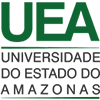

</center>

---

## <center>Código fonte do TCC</center>
##### <center>**Professora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



## Preparação do Ambiente

---



In [1]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

In [2]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.cluster import MeanShift
#from sklearn.cluster import estimate_bandwidth

## Carregamento e preparação do DataFrame de todos os Biomas

---



In [ ]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Criando os DataFrames de focos de queimadas do Brasil
# Onde 
alertas_2019 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/Focos_2019-01-01_2019-12-31.csv')
alertas_2020 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/Focos_2020-01-01_2020-12-31.csv')
alertas_2021 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/Focos_2021-01-01_2021-12-31.csv')
alertas = [alertas_2019, alertas_2020, alertas_2021]
alertas_1921 = pd.concat(alertas)
#alertas_1921 = alertas_2021


In [5]:
alertas_1921

datahora  satelite    pais       estado  \
0       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
1       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
2       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
3       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
4       2019/10/27 17:05:00  AQUA_M-T  Brasil     AMAZONAS   
...                     ...       ...     ...          ...   
184076  2021/08/29 17:05:00  AQUA_M-T  Brasil    TOCANTINS   
184077  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184078  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184079  2021/08/29 17:07:00  AQUA_M-T  Brasil         PARA   
184080  2021/08/29 17:02:00  AQUA_M-T  Brasil        GOIAS   

                   municipio     bioma  diasemchuva  precipitacao  riscofogo  \
0                     PACAJA  Amazonia          2.0           1.6        0.5   
1                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
2                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
3                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
4       NOVA OLINDA DO NORTE  Amazonia          0.0           0.3        0.0   
...                      ...       ...          ...           ...        ...   
184076     LAGOA DA CONFUSAO   Cerrado         88.0           0.0        1.0   
184077    NOVO SANTO ANTONIO   Cerrado        104.0           0.0        1.0   
184078    NOVO SANTO ANTONIO   Cerrado        103.0           0.0        1.0   
184079                PACAJA  Amazonia          2.0           0.0        0.5   
184080       MIMOSO DE GOIAS   Cerrado         37.0           0.0        1.0   

        latitude  longitude    frp  
0       -3.60200  -49.96300  201.6  
1       -3.63000  -52.25500   47.5  
2       -3.63100  -52.26400   17.4  
3       -3.64200  -52.26500   12.4  
4       -3.65100  -58.25400   12.1  
...          ...        ...    ...  
184076 -10.87773  -50.33506  246.6  
184077 -12.37030  -51.13305   10.4  
184078 -12.34445  -51.14636  150.6  
184079  -4.08141  -50.88046   19.3  
184080 -14.97406  -48.20551   28.5  

[604510 rows x 12 columns]

## Carregamento e preparação do DataFrame somente do Bioma Amazônia

---



In [6]:
alertas_amazonia = alertas_1921[alertas_1921['bioma'] == 'Amazonia']

In [7]:
alertas_amazonia

datahora  satelite    pais       estado  \
0       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
1       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
2       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
3       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
4       2019/10/27 17:05:00  AQUA_M-T  Brasil     AMAZONAS   
...                     ...       ...     ...          ...   
184063  2021/08/29 18:45:00  AQUA_M-T  Brasil     AMAZONAS   
184064  2021/08/29 18:45:00  AQUA_M-T  Brasil         ACRE   
184072  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184075  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184079  2021/08/29 17:07:00  AQUA_M-T  Brasil         PARA   

                    municipio     bioma  diasemchuva  precipitacao  riscofogo  \
0                      PACAJA  Amazonia          2.0           1.6        0.5   
1                    ALTAMIRA  Amazonia          0.0           0.5        0.2   
2                    ALTAMIRA  Amazonia          0.0           0.5        0.2   
3                    ALTAMIRA  Amazonia          0.0           0.5        0.2   
4        NOVA OLINDA DO NORTE  Amazonia          0.0           0.3        0.0   
...                       ...       ...          ...           ...        ...   
184063           BOCA DO ACRE  Amazonia         10.0           0.0        1.0   
184064                  FEIJO  Amazonia          0.0           0.0        0.4   
184072  SAO FELIX DO ARAGUAIA  Amazonia         97.0           0.0        1.0   
184075  SAO FELIX DO ARAGUAIA  Amazonia        105.0           0.0        1.0   
184079                 PACAJA  Amazonia          2.0           0.0        0.5   

        latitude  longitude    frp  
0       -3.60200  -49.96300  201.6  
1       -3.63000  -52.25500   47.5  
2       -3.63100  -52.26400   17.4  
3       -3.64200  -52.26500   12.4  
4       -3.65100  -58.25400   12.1  
...          ...        ...    ...  
184063  -9.15154  -68.21212   82.2  
184064  -8.95060  -70.55329   58.9  
184072 -11.26925  -52.74310   37.1  
184075 -11.22230  -52.71341   47.5  
184079  -4.08141  -50.88046   19.3  

[267427 rows x 12 columns]

## Preparação do DataFrame de todos os Biomas

---



In [8]:
geometry = [Point(xy) for xy in zip(alertas_amazonia['longitude'], alertas_amazonia['latitude'])]

In [9]:
alertas_amazonia = gpd.GeoDataFrame(alertas_amazonia, crs='EPSG:4326', geometry=geometry)

In [10]:
type(alertas_amazonia)

geopandas.geodataframe.GeoDataFrame

In [11]:
alertas_amazonia

datahora  satelite    pais       estado  \
0       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
1       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
2       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
3       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
4       2019/10/27 17:05:00  AQUA_M-T  Brasil     AMAZONAS   
...                     ...       ...     ...          ...   
184063  2021/08/29 18:45:00  AQUA_M-T  Brasil     AMAZONAS   
184064  2021/08/29 18:45:00  AQUA_M-T  Brasil         ACRE   
184072  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184075  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184079  2021/08/29 17:07:00  AQUA_M-T  Brasil         PARA   

                    municipio     bioma  diasemchuva  precipitacao  riscofogo  \
0                      PACAJA  Amazonia          2.0           1.6        0.5   
1                    ALTAMIRA  Amazonia          0.0           0.5        0.2   
2                    ALTAMIRA  Amazonia          0.0           0.5        0.2   
3                    ALTAMIRA  Amazonia          0.0           0.5        0.2   
4        NOVA OLINDA DO NORTE  Amazonia          0.0           0.3        0.0   
...                       ...       ...          ...           ...        ...   
184063           BOCA DO ACRE  Amazonia         10.0           0.0        1.0   
184064                  FEIJO  Amazonia          0.0           0.0        0.4   
184072  SAO FELIX DO ARAGUAIA  Amazonia         97.0           0.0        1.0   
184075  SAO FELIX DO ARAGUAIA  Amazonia        105.0           0.0        1.0   
184079                 PACAJA  Amazonia          2.0           0.0        0.5   

        latitude  longitude    frp                     geometry  
0       -3.60200  -49.96300  201.6   POINT (-49.96300 -3.60200)  
1       -3.63000  -52.25500   47.5   POINT (-52.25500 -3.63000)  
2       -3.63100  -52.26400   17.4   POINT (-52.26400 -3.63100)  
3       -3.64200  -52.26500   12.4   POINT (-52.26500 -3.64200)  
4       -3.65100  -58.25400   12.1   POINT (-58.25400 -3.65100)  
...          ...        ...    ...                          ...  
184063  -9.15154  -68.21212   82.2   POINT (-68.21212 -9.15154)  
184064  -8.95060  -70.55329   58.9   POINT (-70.55329 -8.95060)  
184072 -11.26925  -52.74310   37.1  POINT (-52.74310 -11.26925)  
184075 -11.22230  -52.71341   47.5  POINT (-52.71341 -11.22230)  
184079  -4.08141  -50.88046   19.3   POINT (-50.88046 -4.08141)  

[267427 rows x 13 columns]

In [12]:
alertas_amazonia = alertas_amazonia.to_crs(crs='EPSG:3857')

In [13]:
alertas_amazonia.crs.to_string()

'EPSG:3857'

In [14]:
alertas_amazonia['estado'].unique()

array(['PARA', 'AMAZONAS', 'MATO GROSSO', 'MARANHAO', 'RONDONIA',
       'TOCANTINS', 'RORAIMA', 'ACRE', 'AMAPA'], dtype=object)

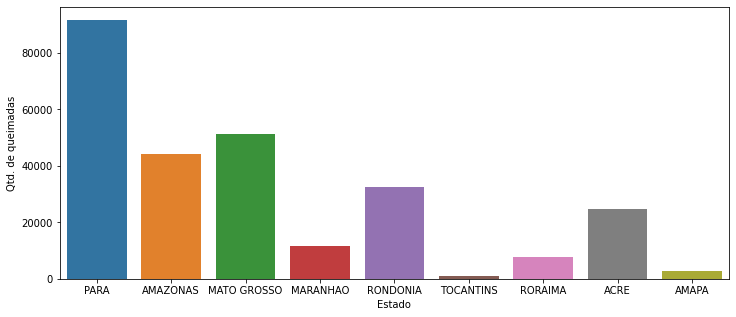

In [15]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='estado', data=alertas_amazonia)
ax.set_xlabel('Estado')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

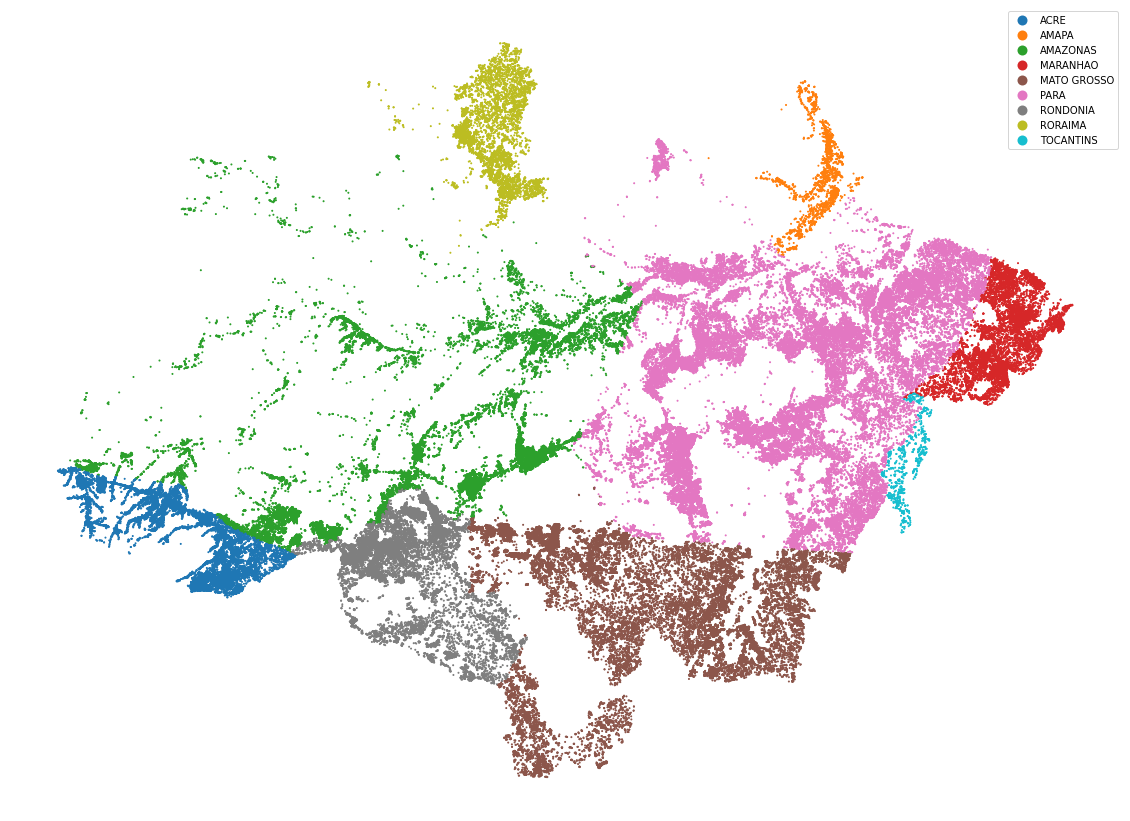

In [16]:
ax = alertas_amazonia.plot(figsize=(20, 15), column='estado', markersize=1, legend=True)
#contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## **Aplicação dos Algoritmos para os Biomas**

*   DBSCAN

**K-Means Para o Bioma Amazônia**

In [17]:
coord_amazonia = alertas_amazonia.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])
#coord_biomas = alertas_1921.drop(columns=["datahora","satelite","pais","estado","municipio","diasemchuva","precipitacao","riscofogo","frp","geometry"])

**DBSCAN para o Bioma Amazônia**

In [18]:
#agrupadorDB = DBSCAN(eps = 1.31, min_samples = 15, metric='manhattan')
#agrupadorDB = DBSCAN(eps = 0.7, min_samples = 6, metric='manhattan')
agrupadorDB = DBSCAN(eps = 0.7, min_samples = 30, metric='manhattan')


agrupadorDB.fit(coord_amazonia)
np.unique(agrupadorDB.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [ ]:
#np.unique(agrupadorDB.labels_)

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = coord_amazonia['latitude'], y = coord_amazonia['longitude'],
                         mode = 'markers',
                         marker = dict(color = agrupadorDB.labels_.astype(np.float)),
                         text = agrupadorDB.labels_))
#fig.show()


fig.update_layout(
    title_text="Highlight Clusters",
    showlegend=True,
)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

